# Predicting heart disease using machine learning

This notebook uses various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

The following approach has been taken for the project:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
>Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Celveland dataset from the UCI Machine Learnign Repository. 
https://archive.ics.uci.edu/ml/datasets/Heart%20Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset.

## 3. Evaluation
>If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project

## 4. Features

**Data dictionary**
1. age: Displays the age of the individual.

2. sex: Displays the gender of the individual using the following format : 
    * 1 = male 
    * 0 = female

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format :
    * 0 = typical angina
    * 1 = atypical angina
    * 2 = non — anginal pain
    * 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

7. restecg- Resting ECG : displays resting electrocardiographic results
    * 0 = normal
    * 1 = having ST-T wave abnormality
    * 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina : 
    * 1 = yes
    * 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment : 
    * 0 = upsloping: better heart rate with excercise (uncommon) 
    * 1 = flat: minimal change (typical healthy heart) 
    * 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. thal : Displays the thalassemia : 
    * 1,3 = normal 
    * 6 = fixed defect 
    * 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no (predicted attribute)


In [1]:
#importing the tools we need

#regular exploratory data analysis(EDA) and plotting librariers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#plots will appear inside notebook
%matplotlib inline

#model from scikit learn
#from sklearn.svm import LinearSVC #we have non linear data so we dont wanna use this
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Load Data

In [2]:
df = pd.read_csv("data/heart-disease.csv")
#rows,columns
df.shape

(303, 14)

# Exploratorty Data Analysis(EDA)
The goal is to find more about the data and become a subject matter expert on the dataset.
1. What are we trying to solve?
2. What kind of data do we have and how do we treat different data ?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change ot remove features to get more out of our data?


In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
# how many types of data are in target lable
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

Since we have relatively close number of 0 and 1, we have a **balanced classification problem**.

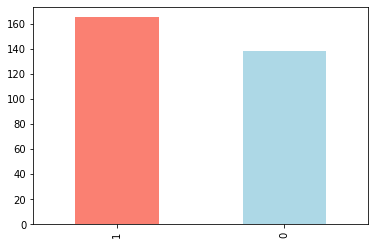

In [6]:
df["target"].value_counts().plot(kind="bar",color=["salmon","lightblue"]);

Okay, the classes aren't highly unbalanced.So we don't need to stratify if we split the data.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#to see the missing data
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

I am gald we dont have any missing data and no categorical features that needs to be transformed.

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Heart Disease Frequency according to Sex

In [10]:
#find number of males and females
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
#compate target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


We can see that only 1 in every 4 women doesnt have heart disease , while almost half of male has heart disease.

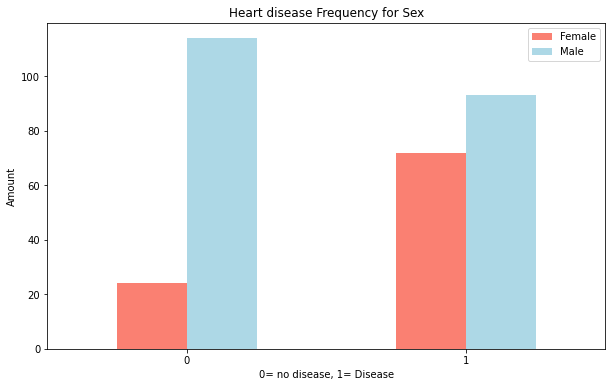

In [12]:
#to visualize crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon","lightblue"])
plt.title("Heart disease Frequency for Sex")
plt.xlabel("0= no disease, 1= Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);


The proportion of female having heart disease is high (almost 75%) while 44.9% men have heart 
disease.

# Age vs. Max Heart Rate for Heart Disease

In [13]:
df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

Since we have 91 different types of max heart rate(thalach), we will visualize it with scatter

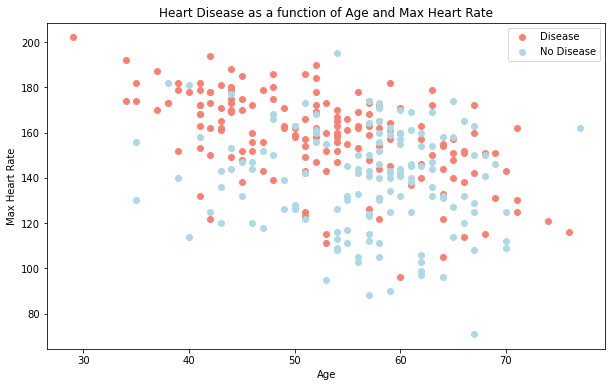

In [14]:
plt.figure(figsize=(10,6))

#scatter with target=1
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon")

#scatter with target=0
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue")

#adding labels
plt.title("Heart Disease as a function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No Disease"]);

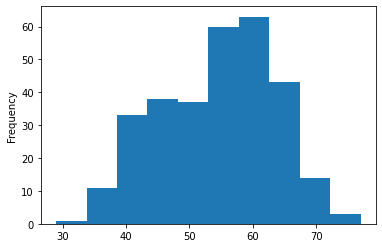

In [15]:
#we can now check the distribution of Age column
df.age.plot.hist();


Its almost like a normal distribution with most people near the age of 60

# Heart Disease frequency per Chest Pain Type
cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


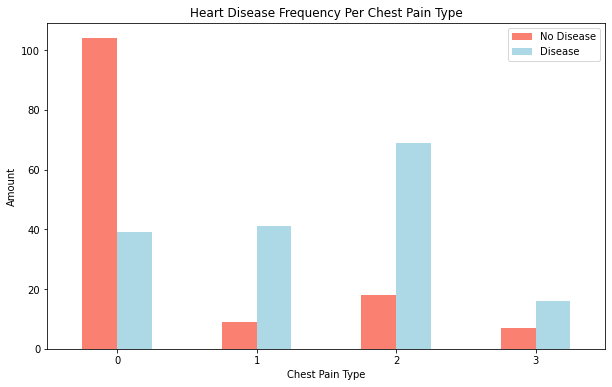

In [17]:
#making it visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                 figsize=(10,6),
                                 color=["salmon","lightblue"])
# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);


# Correlation Matrix

In [18]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


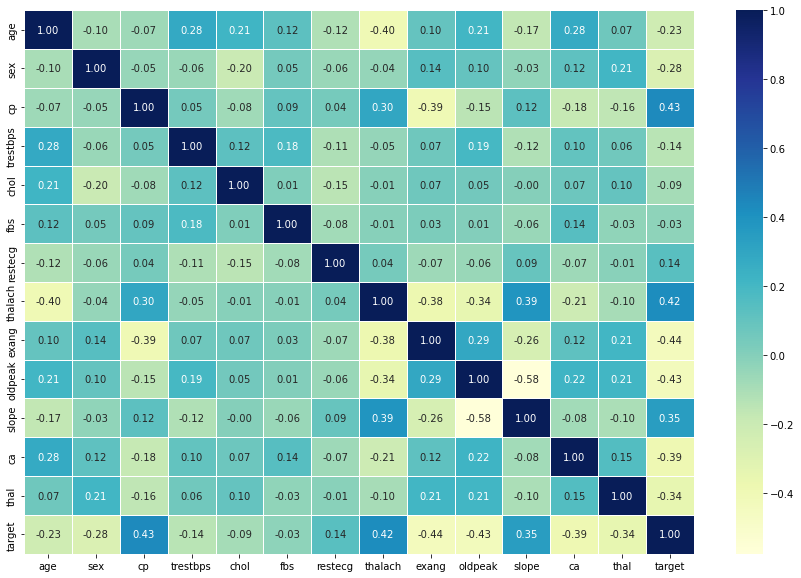

In [19]:
#making correlation matrix visual
corr_matrix=df.corr()
fig,ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu");

Positive correlations means we have direct porportional relationship. Eg: thalach-target .An increase in thalach(maximum heart rate) means increase in the chance of having heart disease 

Negative correlation means we have inversely proportional relationship. Eg:exang-target . An increase in exang(chest pain) means we actually have a change that it is not related to heart disease.

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
#split the data into X and y
X=df.drop("target",axis=1)
y=df["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [22]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [23]:
#split the data into test and train
np.random.seed(42)

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2)

X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [24]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we will train and test the model.

We are going to be using 
1. SVC linear
2. Logistic Regression
3. K-Nearest Neighbours Classifier
4. Random Forest Classifier

In [25]:
#we put the models into a dictionary
models={
       "Logistic Regression": LogisticRegression(),
       "KNN": KNeighborsClassifier(),
       "Random Forest": RandomForestClassifier()}

#this fucntions fits and scores the model
def fit_and_score(models,X_train,X_test,y_train,y_test):
    """
    this function fit and scores the models
    models= a dict of diff scikit learn ml models
    X_train=training data(no-labels)
    X_test=testing data(no-labels)
    y_train : training labels
    y_test : test labels
    """
    #set random seed for repeatability
    np.random.seed(42)
    #a dict to store the score of the models
    model_scores = {}
    #loop through the models
    for name,model in models.items():
        #fit the model
        model.fit(X_train,y_train)
        #evaluate the model using default score parameter
        #and store in the dict with key=name
        model_scores[name] = model.score(X_test,y_test)
        
    return model_scores

In [26]:
model_scores=fit_and_score(models=models,
                         X_train=X_train,
                         X_test=X_test,
                         y_train=y_train,
                         y_test=y_test)
model_scores

/home/ubuntu/projects/github_upload/heart-disease-project/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

**Logistic Regressin model** failed to converge but it shows higher scores than other models. Will **hyperparameter tuning** help out in our case?

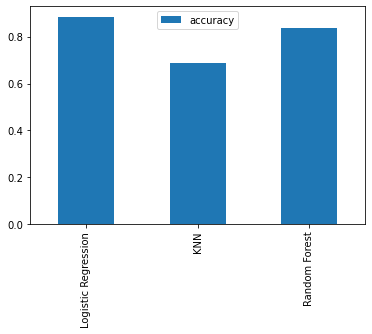

In [27]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Now we've got a baseline model and we know a model's first predictions aren't always what we should based our next steps off. So lt's look at the following:

* Hypyterparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning:(manual)

In [28]:
#lets tune KNN
train_scores=[]
test_scores=[]

#create a list of different values of n_neighbours
neighbors=range(1,21)

#setup knn instance
knn=KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(X_train,y_train)
    
    #update the train scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #update the test scores list
    test_scores.append(knn.score(X_test,y_test))

In [29]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


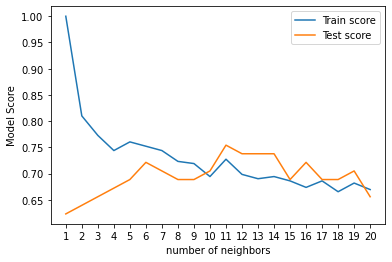

In [30]:
plt.plot(neighbors,train_scores,label="Train score")
plt.plot(neighbors,test_scores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

Max score we were able to get with KNN model is 75.41% at about k=11 neighbours with default distance metric parameter.So we wont consider this model for further optimization.

## Hyperparameter tuning with RandomizedSearchCV
We will tune :
   * Logistic Regression()
   * RandomForestClassifier()
   
Let’s create a hyperparameter grid (a dictionary of different hyperparameters) for each and then test them out.



In [31]:
#hyperparameter grid for logistic regression
log_reg_grid = {"C": np.logspace(-4,4,20),
               "solver":["liblinear"]}

#hyperparameter grid for randomforest classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}


Now let’s use RandomizedSearchCV to try and tune our LogisticRegression model.

We’ll pass it the different hyperparameters from log_reg_grid as well as set n_iter = 20. This means, RandomizedSearchCV will try 20 different combinations of hyperparameters from log_reg_grid and save the best ones.

In [32]:
#tune Logistic Regression
np.random.seed(42)

#setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5, 
                               n_iter=20,
                               verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [33]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [34]:
rs_log_reg.score(X_test,y_test),model_scores["Logistic Regression"]

(0.8852459016393442, 0.8852459016393442)

We dont see much improvement in the accuracy score in out tuning. Now we’ve tuned LogisticRegression using RandomizedSearchCV, we’ll do the same for RandomForestClassifier.

In [35]:
#tune Randomforest classifier
np.random.seed(42)

#setup random hyperparameter search for Logistic Regression
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)


In [36]:
rs_rf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [37]:
# better hyperparameters are
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [38]:
rf_grid

{'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
        660, 710, 760, 810, 860, 910, 960]),
 'max_depth': [None, 3, 5, 10],
 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])}

In [39]:
rs_rf.score(X_test,y_test)

0.8688524590163934

In [40]:
model_scores["Random Forest"]

0.8360655737704918

In [41]:
rs_rf.score(X_test,y_test)-model_scores["Random Forest"]

0.032786885245901565

We see a 3% improvement from our tuning for random forest classifier. Since LogisticRegression is pulling out in front, we’ll try tuning it further with GridSearchCV.

## Hyperparameter Tuning with GridSearchCV

### Tuning a model with GridSearchCV
The difference between RandomizedSearchCV and GridSearchCV is where RandomizedSearchCV searches over a grid of hyperparameters performing n_iter combinations, GridSearchCV will test every single possible combination.

In short:

* RandomizedSearchCV – tries n_iter combinations of hyperparameters and saves the best.
* GridSearchCV – tries every single combination of hyperparameters and saves the best.


In [42]:
#logistic regression hyperparameters for tuning
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"],
               "penalty":["l1","l2"]}
#we initialize gridsearch CV for tuning
gs_log_reg= GridSearchCV(LogisticRegression(),
                        param_grid=log_reg_grid,
                        cv=5,
                        verbose=True)

#fit the model with our optimized parameters
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             verbose=True)

In [43]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}

In [44]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

# Evaluating a classification model, beyond accuracy
Now we’ve got a tuned model, let’s get some more metrics .

We will measure:

* ROC curve and AUC score – plot_roc_curve()
* Confusion matrix – confusion_matrix()
* Classification report – classification_report()
* Precision – precision_score()
* Recall – recall_score()
* F1-score – f1_score()

We will use cross-validation wherever possbile.

In [45]:
# Make predictions on test data
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

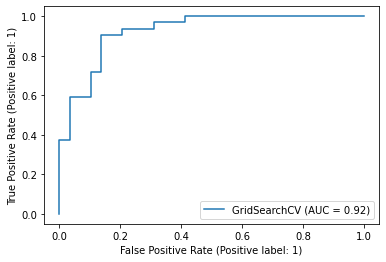

In [46]:
# Plot ROC curve and calculate and calculate AUC metric
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(gs_log_reg,X_test,y_test)

The curve means a larger area under the curve (AUC) is usually better. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one.The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.




## Confusion Matrix

In [47]:
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]])

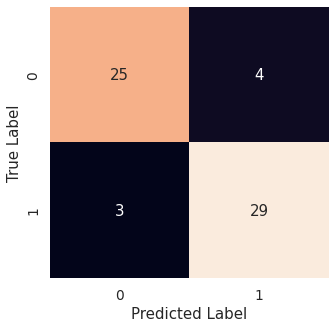

In [48]:
#we will use heat map.
sns.set(font_scale=1.25)

#function to plot the confusion matrix
def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborns heatmap()
    """
    fig,ax = plt.subplots(figsize=(5,5))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    
    
plot_conf_mat(y_test,y_preds)

This confusion matrix shows that we only have 3 False neagative and 4 False Positive.

## Classificatin Report

In [49]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Since we dont have an imbalanced set, we can ignore macro avg and weighted avg. If the model has no false positive, then precision value is 1.0. If the model produces no false negative, then Recall value is 1.0.F1 is a combination of precision and recall.

## Calculating some evaluation metrics using cross-validation

We're going to calculate accuracy, precision, recall and f1-score of our model using cross-validation and to do so we'll be using cross_val_score().

In [50]:
# Check best hyperparameters
print(gs_log_reg.best_params_)
print("==========================================")

#initialise classifier using our tuned hyperparameters
clf=LogisticRegression(C= 0.23357214690901212,
                       penalty = 'l2',
                       solver = 'liblinear')

# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="accuracy")
cv_acc

{'C': 0.23357214690901212, 'penalty': 'l2', 'solver': 'liblinear'}


array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [51]:
#finding the mean of the accuracy
cv_acc = np.mean(cv_acc)
print("accuracy score: ",cv_acc)

accuracy score:  0.8479781420765027


In [52]:
# Cross-validated precision
cv_precision =  cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="precision")
print(cv_precision)
print("==========================================")
cv_precision = np.mean(cv_precision)
print("precision score: ",cv_precision)

[0.775      0.88571429 0.86111111 0.86111111 0.725     ]
precision score:  0.8215873015873015


In [53]:
# Cross-validated precision
cv_recall =  cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="recall")
print(cv_recall)
print("==========================================")
cv_recall = np.mean(cv_recall)
print("precision score: ",cv_recall)

[0.93939394 0.93939394 0.93939394 0.93939394 0.87878788]
precision score:  0.9272727272727274


In [54]:
# Cross-validated precision
cv_f1 =  cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
print(cv_f1)
print("==========================================")
cv_f1 = np.mean(cv_f1)
print("precision score: ",cv_f1)

[0.84931507 0.91176471 0.89855072 0.89855072 0.79452055]
precision score:  0.8705403543192143


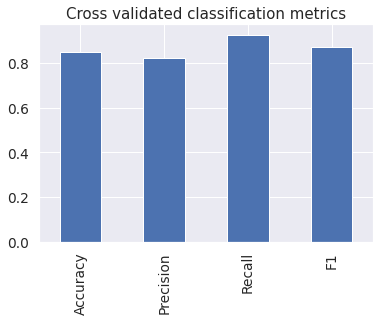

In [55]:
#we will visualize the cross validated metric
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1}, index=[0])
cv_metrics.T.plot.bar(title= "Cross validated classification metrics",
                     legend=False);

Accuracy Score = (TP+TN)/ (TP+FN+TN+FP)

Precision Score = TP / (TP + FP) is the ability of the classifier not to label as positive a sample that is negative.

Recall =TP / (TP + FN) is the ability of the classifier to find all the positive samples.

F1 = 2 * (precision * recall) / (precision + recall) 

The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal.

# Feature Importance
Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"



Let's find the feature importance for our LogisticRegression model.

In [56]:
#we will instantiate logistic regression with our hyper parameters.
#initialise classifier using our tuned hyperparameters
clf=LogisticRegression(C= 0.23357214690901212,
                       penalty = 'l2',
                       solver = 'liblinear')
clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [57]:
#now we will have to match classifiers coefficients(weights) to out lables in the column.
print(clf.coef_)
print("===================================================")
df.head()

[[ 0.00369922 -0.90424098  0.67472823 -0.0116134  -0.00170364  0.04787687
   0.33490208  0.02472938 -0.63120414 -0.57590996  0.47095166 -0.65165344
  -0.69984217]]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [58]:
clf.coef_[0]

array([ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
        0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
        0.47095166, -0.65165344, -0.69984217])

In [59]:
#mactching coeffs to the columns
#clf.coef_[0] changes into array
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

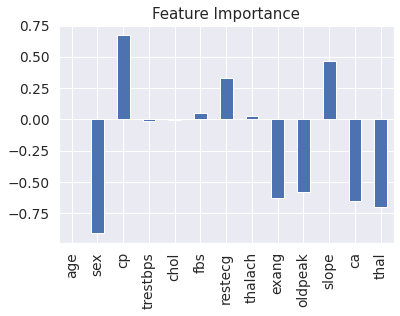

In [60]:
#we will visualize feature importance
feature_df= pd.DataFrame(feature_dict,index=[0]);
feature_df.T.plot.bar(title= "Feature Importance",legend=False);

* Negative values imply negative correlation. This means they have inverse relationship. For example, as sex value decreases (female=0), then there is high chance for them to get heart disease(target=1).

* Positive values imply positive correlation. This means they have directly proportional relationship. Also as cp values increases (3: Asymptomatic: chest pain not showing signs of disease), it means the person have higher chance that it can be a heart disease.

* Also this graph is useful in finding what features contribure to our target value (whether or not someone have heart disease)

## Experimentation

We havent hit our evaluation target of 95% accuracy score. So we can think about 
* The possibility of collecting more data? Our dataset is downloaded from the ml repository and it has only 303 rows. So we cant really collect more data.
* Could we use other models? Gradient boosting can be a useful method to try it out.

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
clf.score(X_test,y_test)

0.7704918032786885

In [63]:
y_preds = clf.predict(X_test)
print(classification_report(y_test, y_preds, target_names=['Heart Disease', 'Not Heart Disease']))
    

                   precision    recall  f1-score   support

    Heart Disease       0.74      0.79      0.77        29
Not Heart Disease       0.80      0.75      0.77        32

         accuracy                           0.77        61
        macro avg       0.77      0.77      0.77        61
     weighted avg       0.77      0.77      0.77        61



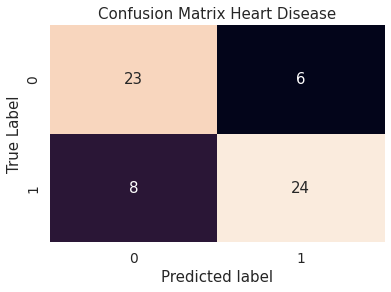

In [64]:
sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
plt.xlabel("Predicted label")
plt.ylabel("True Label")
plt.title("Confusion Matrix Heart Disease")
plt.show()

## Conclusion:
We were able to get cross validated accuracy of 84.79% from our **logistive regression algorithm**. But we are nowhere near 95 % accuracy target. As an experimentation , we tried Gradient boosting algorithm. The base model showed accuracy of 77% but more time is needed for tuning hyperparameters. We can pause the project for now and work on it whenever we get a chance. This project could be investigated by plotting learning curves for each model and it can give insights into how the model is learning.